In [59]:
#google search from jupyter
#Warning: Slow over many queries because time between queries is 2s. 
#Google might block your IP otherwise
#https://www.geeksforgeeks.org/performing-google-search-using-python-code/

from googlesearch import search
[print(j) for j in search('steph curry', tld='com', lang='en', num=5, start=0, stop=1, pause=2.0)]

https://www.fastcompany.com/90245288/steph-curry-and-the-new-palm-want-you-to-forget-your-phone
https://sports.yahoo.com/sources-stephen-curry-avoid-suspension-stepping-court-dead-ball-situation-164447905.html
https://sports.yahoo.com/report-steph-curry-wont-suspended-172927886.html
https://en.wikipedia.org/wiki/Stephen_Curry
https://en.wikipedia.org/wiki/Ayesha_Curry
https://en.wikipedia.org/wiki/Dell_Curry
https://en.wikipedia.org/wiki/Stephen_Curry_(disambiguation)
https://en.wikipedia.org/wiki/Jump_shot_(basketball)
https://www.basketball-reference.com/players/c/curryst01.html
http://www.espn.com/nba/player/_/id/3975/stephen-curry


[None, None, None, None, None, None, None, None, None, None]

In [71]:
#scrapes basketball reference for Steph Curry's year-by-year points/game stats
import pandas as pd
import requests
from bs4 import BeautifulSoup

res = requests.get("https://www.basketball-reference.com/players/c/curryst01.html")

soup = BeautifulSoup(res.content,'lxml')

In [72]:
#Printing out info on all tables on page
[print(j.text,'\n----------------------\n',j.attrs,'\n======================\n') for j in soup.find_all('table')]

2018-19 Projection Table




Per 36 Minutes
Shooting


Season
Age
Lg
FG
FGA
3P
3PA
FT
FTA
ORB
TRB
AST
STL
BLK
TOV
PF
PTS
FG%
3P%
FT%
WS/48



2018-1930NBA9.319.34.510.75.25.70.95.46.81.90.23.32.528.3.483.420.907.250
 
----------------------
 {'class': ['sortable', 'stats_table'], 'id': 'projection', 'data-cols-to-freeze': '2'} 

Per Game Table



Season
Age
Tm
Lg
Pos
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PTS



2009-1021GSWNBAPG807736.26.614.3.4622.14.8.4374.59.5.474.5352.22.5.8850.63.94.55.91.90.23.03.217.5
2010-1122GSWNBAPG747433.66.814.2.4802.04.6.4424.89.6.498.5512.93.1.9340.73.23.95.81.50.33.13.118.6
2011-1223GSWNBAPG262328.25.611.4.4902.14.7.4553.56.7.514.5831.51.8.8090.62.83.45.31.50.32.52.414.7
2012-1324GSWNBAPG787838.28.017.8.4513.57.7.4534.510.1.449.5493.43.7.9000.83.34.06.91.60.23.12.522.9
2013-1425GSWNBAPG787836.58.417.7.4713.37.9.4245.09.8.509.5663.94.5.8850.63.74.38.51.60.23.82.524.0
2014-1526GSWNBAPG808032.78.216.8.4873.6

[None, None]

In [73]:
#printing out 'id' for each table
[print(j.attrs['id']) for j in soup.find_all('table')]

projection
per_game


[None, None]

In [77]:
#index is 1 due to new addition to their website
table = soup.find_all('table')[1]

#Save the table to pandas DF so that the index is the date in Season column
df = pd.read_html(str(table), parse_dates=True,index_col="Season")[0]

#look at the all rows,co of the df
pd.set_option("display.max_columns",100)
df.head(len(df))

,Age,Tm,Lg,Pos,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
Season,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-10,21.0,GSW,NBA,PG,80,77,36.2,6.6,14.3,0.462,2.1,4.8,0.437,4.5,9.5,0.474,0.535,2.2,2.5,0.885,0.6,3.9,4.5,5.9,1.9,0.2,3.0,3.2,17.5
2010-11,22.0,GSW,NBA,PG,74,74,33.6,6.8,14.2,0.480,2.0,4.6,0.442,4.8,9.6,0.498,0.551,2.9,3.1,0.934,0.7,3.2,3.9,5.8,1.5,0.3,3.1,3.1,18.6
2011-12,23.0,GSW,NBA,PG,26,23,28.2,5.6,11.4,0.490,2.1,4.7,0.455,3.5,6.7,0.514,0.583,1.5,1.8,0.809,0.6,2.8,3.4,5.3,1.5,0.3,2.5,2.4,14.7
2012-13,24.0,GSW,NBA,PG,78,78,38.2,8.0,17.8,0.451,3.5,7.7,0.453,4.5,10.1,0.449,0.549,3.4,3.7,0.900,0.8,3.3,4.0,6.9,1.6,0.2,3.1,2.5,22.9
2013-14,25.0,GSW,NBA,PG,78,78,36.5,8.4,17.7,0.471,3.3,7.9,0.424,5.0,9.8,0.509,0.566,3.9,4.5,0.885,0.6,3.7,4.3,8.5,1.6,0.2,3.8,2.5,24.0
2014-15,26.0,GSW,NBA,PG,80,80,32.7,8.2,16.8,0.487,3.6,8.1,0.443,4.6,8.7,0.528,0.594,3.9,4.2,0.914,0.7,3.6,4.3,7.7,2.0,0.2,3.1,2.0,23.8
2015-16,27.0,GSW,NBA,PG,79,79,34.2,10.2,20.2,0.504,5.1,11.2,0.454,5.1,9.0,0.566,0.630,4.6,5.1,0.908,0.9,4.6,5.4,6.7,2.1,0.2,3.3,2.0,30.1
2016-17,28.0,GSW,NBA,PG,79,79,33.4,8.5,18.3,0.468,4.1,10.0,0.411,4.4,8.3,0.537,0.580,4.1,4.6,0.898,0.8,3.7,4.5,6.6,1.8,0.2,3.0,2.3,25.3
2017-18,29.0,GSW,NBA,PG,51,51,32.0,8.4,16.9,0.495,4.2,9.8,0.423,4.2,7.1,0.595,0.618,5.5,5.9,0.921,0.7,4.4,5.1,6.1,1.6,0.2,3.0,2.2,26.4


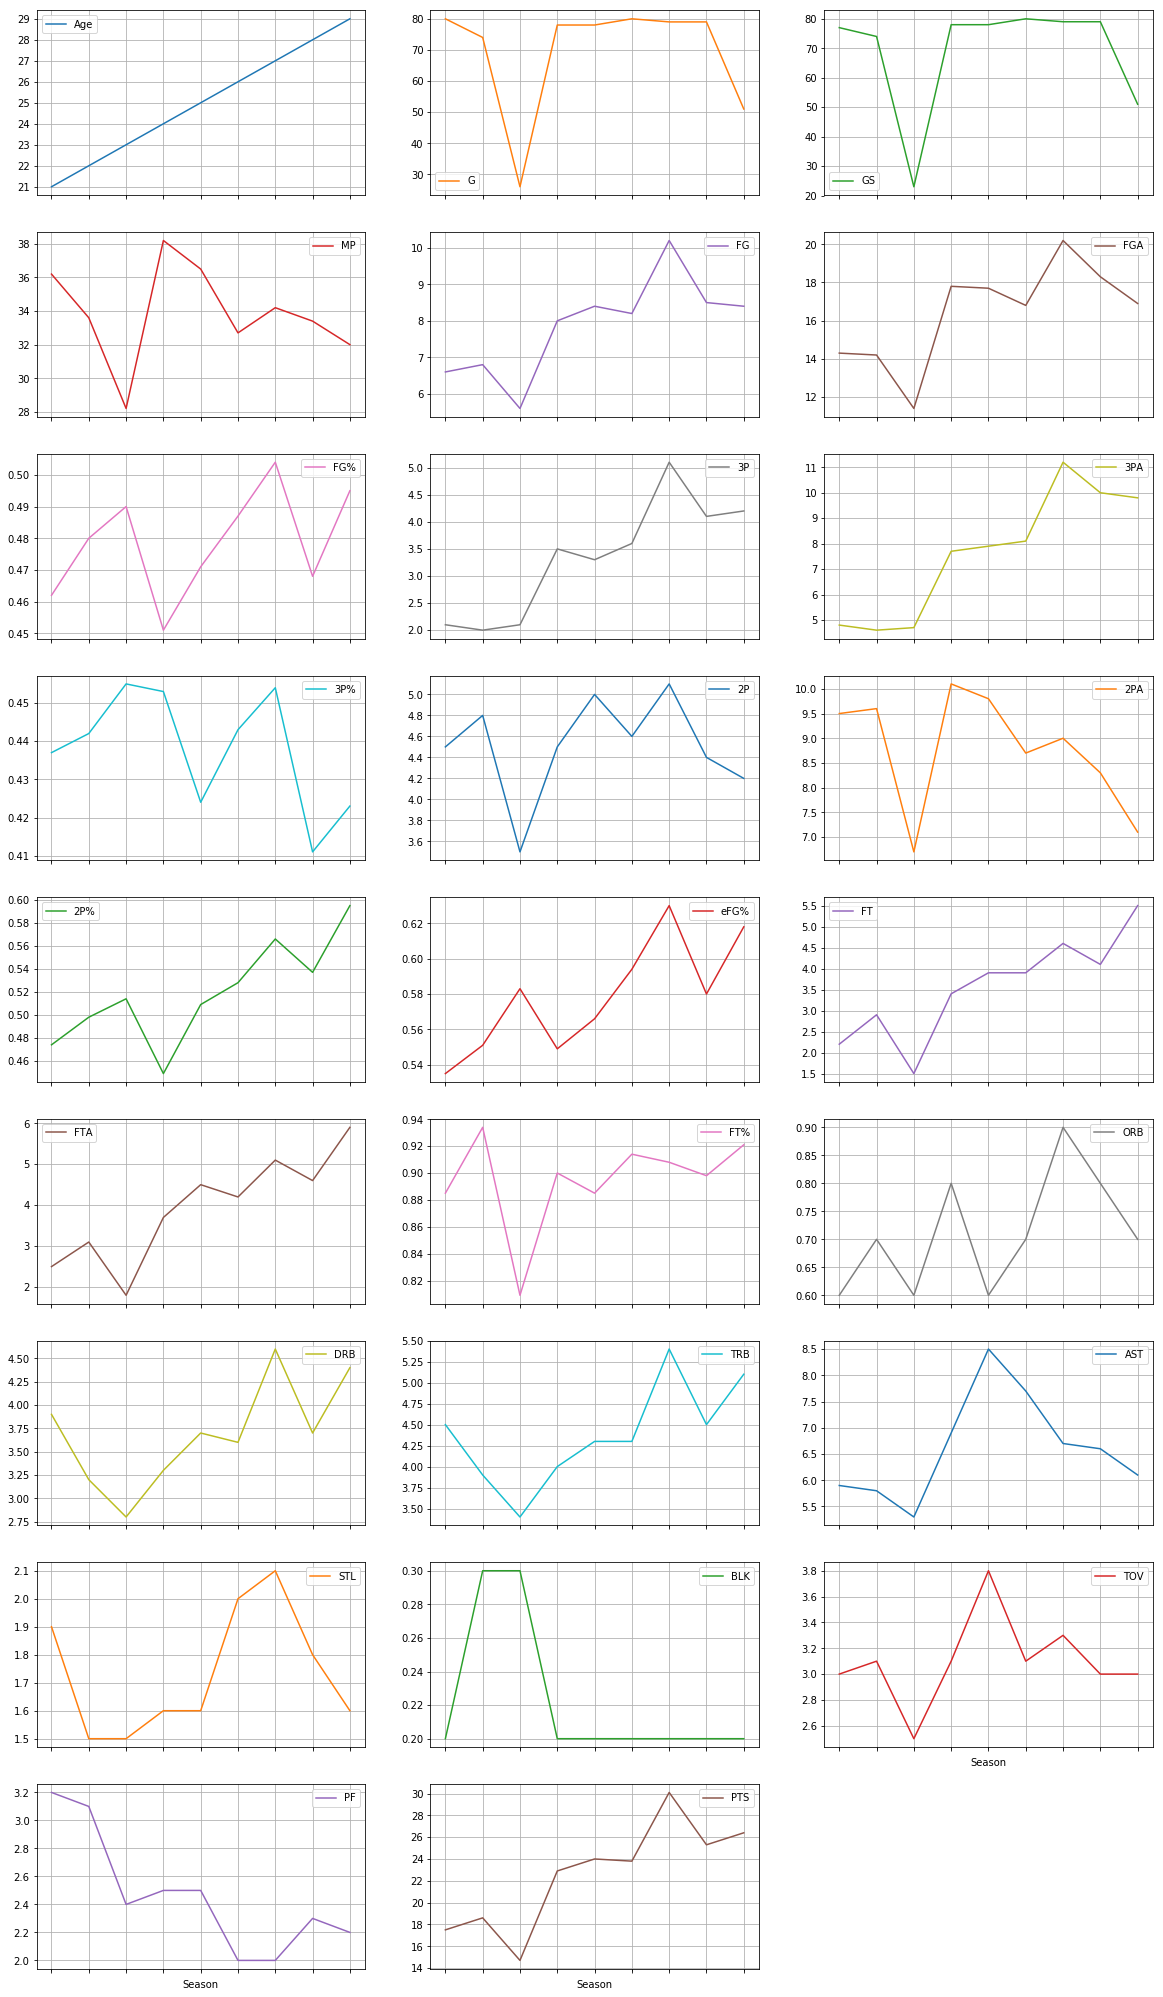

In [83]:
#make plots of all columns in the DF not including the last row called 'Career'


import matplotlib.pylab as plt
plt.rcParams['figure.figsize'] = [20, 40]


df.iloc[:-1].plot(subplots=True,grid=True,sharex=True,layout=(9, 3))
plt.show()